In [290]:
import os
import pandas as pd

from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
#data_dir = 'original/data/'
data_dir = '.'
merged_data = pd.read_csv(os.path.join(data_dir, 'full_data.csv'), index_col=0)
merged_data = merged_data.sort_values(by='Date')
merged_data

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,headline_topic_0,headline_topic_1,headline_topic_2,headline_topic_3,headline_topic_4,headline_topic_5,headline_topic_6,headline_topic_7,headline_topic_8,headline_topic_9
1862,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',...,0.077452,0.027559,0.089896,0.054157,0.137296,0.137123,0.227256,0.055558,0.134330,0.059373
1861,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',...,0.112519,0.106180,0.089383,0.037320,0.143491,0.097843,0.282645,0.042399,0.030168,0.058052
1860,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""",...,0.101699,0.028118,0.036736,0.081626,0.028117,0.111068,0.311158,0.107205,0.108571,0.085703
1859,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",...,0.066877,0.127792,0.065496,0.073997,0.123949,0.070983,0.184402,0.040296,0.134380,0.111827
1858,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,...,0.067761,0.053651,0.108737,0.069179,0.238253,0.028422,0.124376,0.117796,0.163402,0.028423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2015-12-24,17593.25977,17606.33984,17543.94922,17552.16992,40350000,17552.16992,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,...,0.047896,0.031415,0.142586,0.101517,0.180953,0.082138,0.100350,0.080106,0.088354,0.144683
3,2015-12-28,17535.66016,17536.90039,17437.33984,17528.26953,59770000,17528.26953,0,"Germany recruits 8,500 teachers to teach Germa...","Almost 23,000 people have signed an Italian po...",...,0.119535,0.071326,0.085798,0.064230,0.071513,0.117877,0.088288,0.110055,0.129131,0.142246
2,2015-12-29,17547.36914,17750.01953,17547.36914,17720.98047,69860000,17720.98047,1,Pentagon thwarts Obama's effort to close Guant...,Rare Footage of Giant Squid in Japan,...,0.025869,0.100564,0.083868,0.041240,0.040796,0.086534,0.198290,0.131858,0.178987,0.111994
1,2015-12-30,17711.93945,17714.13086,17588.86914,17603.86914,59760000,17603.86914,0,Tech companies face criminal charges if they n...,Mexican marijuana farmers see profits tumble a...,...,0.171677,0.115656,0.111462,0.057831,0.041672,0.066334,0.202921,0.092443,0.083179,0.056824


In [292]:
merged_data

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,headline_topic_0,headline_topic_1,headline_topic_2,headline_topic_3,headline_topic_4,headline_topic_5,headline_topic_6,headline_topic_7,headline_topic_8,headline_topic_9
1862,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',...,0.077452,0.027559,0.089896,0.054157,0.137296,0.137123,0.227256,0.055558,0.134330,0.059373
1861,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',...,0.112519,0.106180,0.089383,0.037320,0.143491,0.097843,0.282645,0.042399,0.030168,0.058052
1860,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""",...,0.101699,0.028118,0.036736,0.081626,0.028117,0.111068,0.311158,0.107205,0.108571,0.085703
1859,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",...,0.066877,0.127792,0.065496,0.073997,0.123949,0.070983,0.184402,0.040296,0.134380,0.111827
1858,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,...,0.067761,0.053651,0.108737,0.069179,0.238253,0.028422,0.124376,0.117796,0.163402,0.028423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2015-12-24,17593.25977,17606.33984,17543.94922,17552.16992,40350000,17552.16992,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,...,0.047896,0.031415,0.142586,0.101517,0.180953,0.082138,0.100350,0.080106,0.088354,0.144683
3,2015-12-28,17535.66016,17536.90039,17437.33984,17528.26953,59770000,17528.26953,0,"Germany recruits 8,500 teachers to teach Germa...","Almost 23,000 people have signed an Italian po...",...,0.119535,0.071326,0.085798,0.064230,0.071513,0.117877,0.088288,0.110055,0.129131,0.142246
2,2015-12-29,17547.36914,17750.01953,17547.36914,17720.98047,69860000,17720.98047,1,Pentagon thwarts Obama's effort to close Guant...,Rare Footage of Giant Squid in Japan,...,0.025869,0.100564,0.083868,0.041240,0.040796,0.086534,0.198290,0.131858,0.178987,0.111994
1,2015-12-30,17711.93945,17714.13086,17588.86914,17603.86914,59760000,17603.86914,0,Tech companies face criminal charges if they n...,Mexican marijuana farmers see profits tumble a...,...,0.171677,0.115656,0.111462,0.057831,0.041672,0.066334,0.202921,0.092443,0.083179,0.056824


In [293]:
merged_data.fillna('', inplace=True)
assert len(merged_data[merged_data.isna().any(axis=1)]) == 0

In [294]:
train_ratio = 0.8

split_index = int(len(merged_data) * train_ratio)

train_df = merged_data[:split_index]
val_df = merged_data[split_index:]

In [295]:
X_cols = ['Open',
          #'High', 'Low',
          #'Volume',
          #'finbert_positive',
          'finbert_negative',
          #'vader_sentiment_compound',
          #'headline_topic_0', 'headline_topic_1', 'headline_topic_2', 'headline_topic_3', 'headline_topic_4'
         ]
X_train = train_df[X_cols]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = val_df[X_cols]
X_test = scaler.transform(X_test)

In [296]:
y_train = train_df['Close']
target = val_df['Close']

In [297]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        #n_estimators=100, learning_rate=0.05, max_depth=5, gamma=0.1,
                        seed=42)

In [298]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [299]:
prediction_xgbr = xgbr.predict(X_test)
root_mean_squared_error(target, prediction_xgbr), mean_squared_error(target, prediction_xgbr), r2_score(target, prediction_xgbr)

(np.float64(731.1702703164425),
 np.float64(534609.9641946196),
 -0.6715113775730486)

In [300]:
reg = LinearRegression().fit(X_train, y_train)

In [301]:
prediction = reg.predict(X_test)
root_mean_squared_error(target, prediction), mean_squared_error(target, prediction), r2_score(target, prediction) * 100, explained_variance_score(target, prediction)

(np.float64(151.3422641127142),
 np.float64(22904.480906762536),
 92.83868558440844,
 0.9284044142622908)

In [302]:
#for open, close, prediction in zip(val_df['Open'].values, val_df['Close'].values, prediction):
#    print(open, close, prediction, close-prediction, open-prediction)
#val_df['Open'].values #, val_df.iloc[5]['Close'], prediction[5]

In [303]:
svr = SVR()
reg_ada = AdaBoostRegressor(random_state=10, n_estimators=50, estimator=None).fit(X_train, y_train)

In [304]:
prediction_ada = reg_ada.predict(X_test)
root_mean_squared_error(target, prediction_ada), mean_squared_error(target, prediction_ada), r2_score(target, prediction_ada) * 100, explained_variance_score(target, prediction_ada)

(np.float64(1131.9353867088073),
 np.float64(1281277.719683617),
 -300.6042591271948,
 0.07695851985736202)

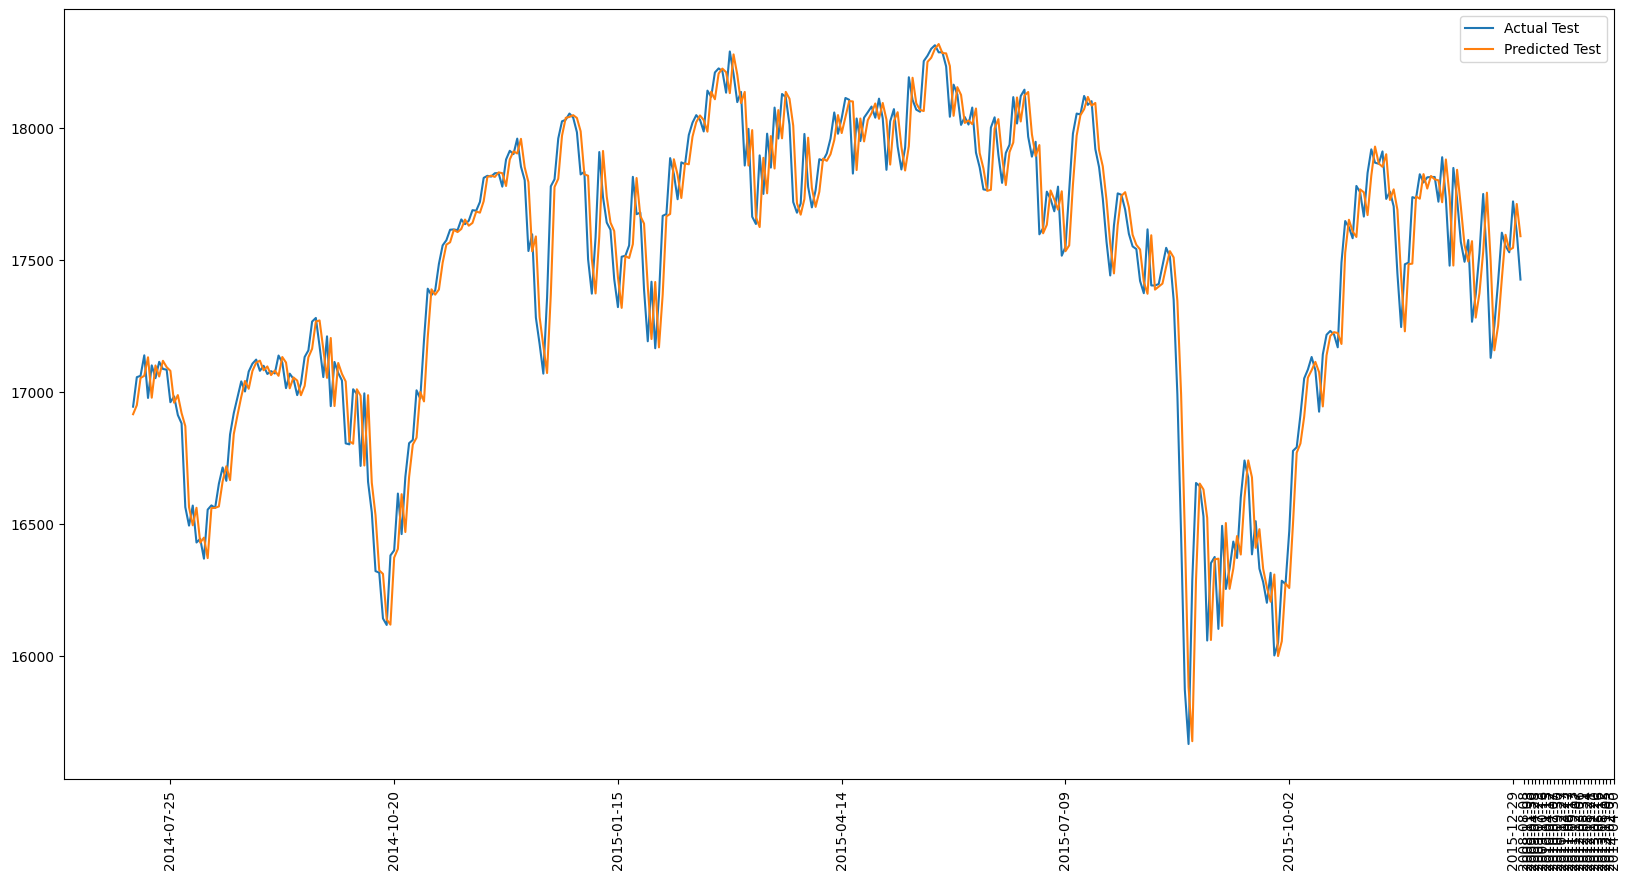

In [307]:
dates = merged_data['Date'].values
sampleInterval = 60
sampledDates = dates[::sampleInterval]

model = reg

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

plt.figure(figsize=(20, 10))
#plt.plot(dates[:len(train_df)], train_df['Close'], label='Actual Train')
#plt.plot(dates[:len(train_df)], trainPredict, label='Predicted Train')
plt.plot(dates[len(train_df):len(train_df) + len(val_df)], val_df['Close'], label='Actual Test')
plt.plot(dates[len(train_df):len(train_df) + len(val_df)], testPredict, label='Predicted Test')

plt.xticks(sampledDates, rotation=90)

plt.legend()
plt.show()